<a href="https://colab.research.google.com/github/tejalyadav/Data_Analytics_Experiments/blob/main/Expt4_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=pd.read_csv('/content/drive/MyDrive/climate_change.csv')


In [ ]:
dataset.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
dataset.shape
print("No of data samples")
print(dataset.shape[0])
print("No of features")
print(dataset.shape[1])
print("No of missing values")
print(dataset.isnull().sum())

No of data samples
308
No of features
11
No of missing values
Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64


In [ ]:
df=dataset.fillna(0)
print(df.isnull().sum())

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64


In [ ]:
df.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

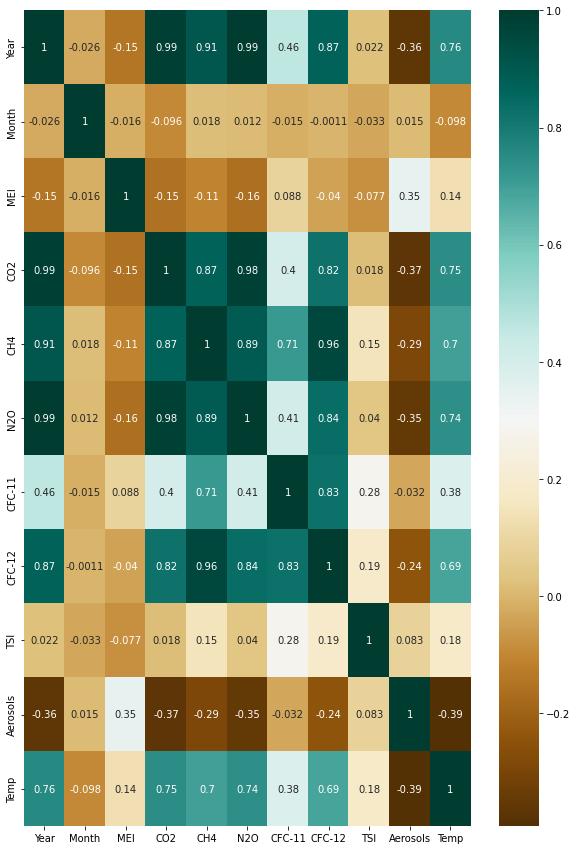

In [ ]:
import seaborn as sns
plt.figure(figsize=[10,15])
correlation=df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,cmap="BrBG",annot=True)

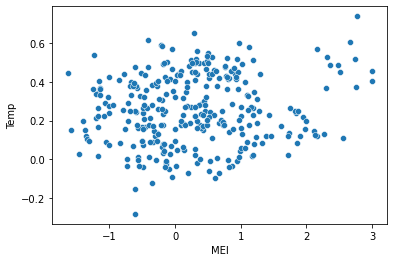

In [ ]:
sns.scatterplot(x='MEI',y='Temp',data=df)

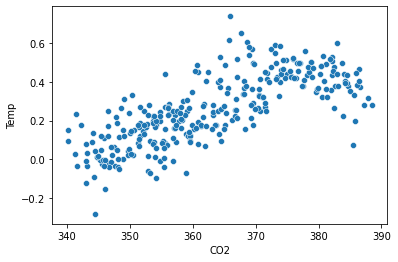

In [ ]:
sns.scatterplot(x='CO2',y='Temp',data=df)

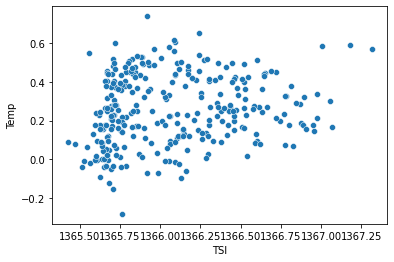

In [ ]:
sns.scatterplot(x='TSI',y='Temp',data=df)

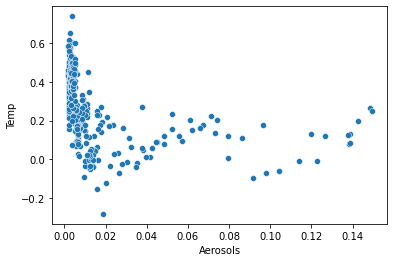

In [ ]:
sns.scatterplot(x='Aerosols',y='Temp',data=df)

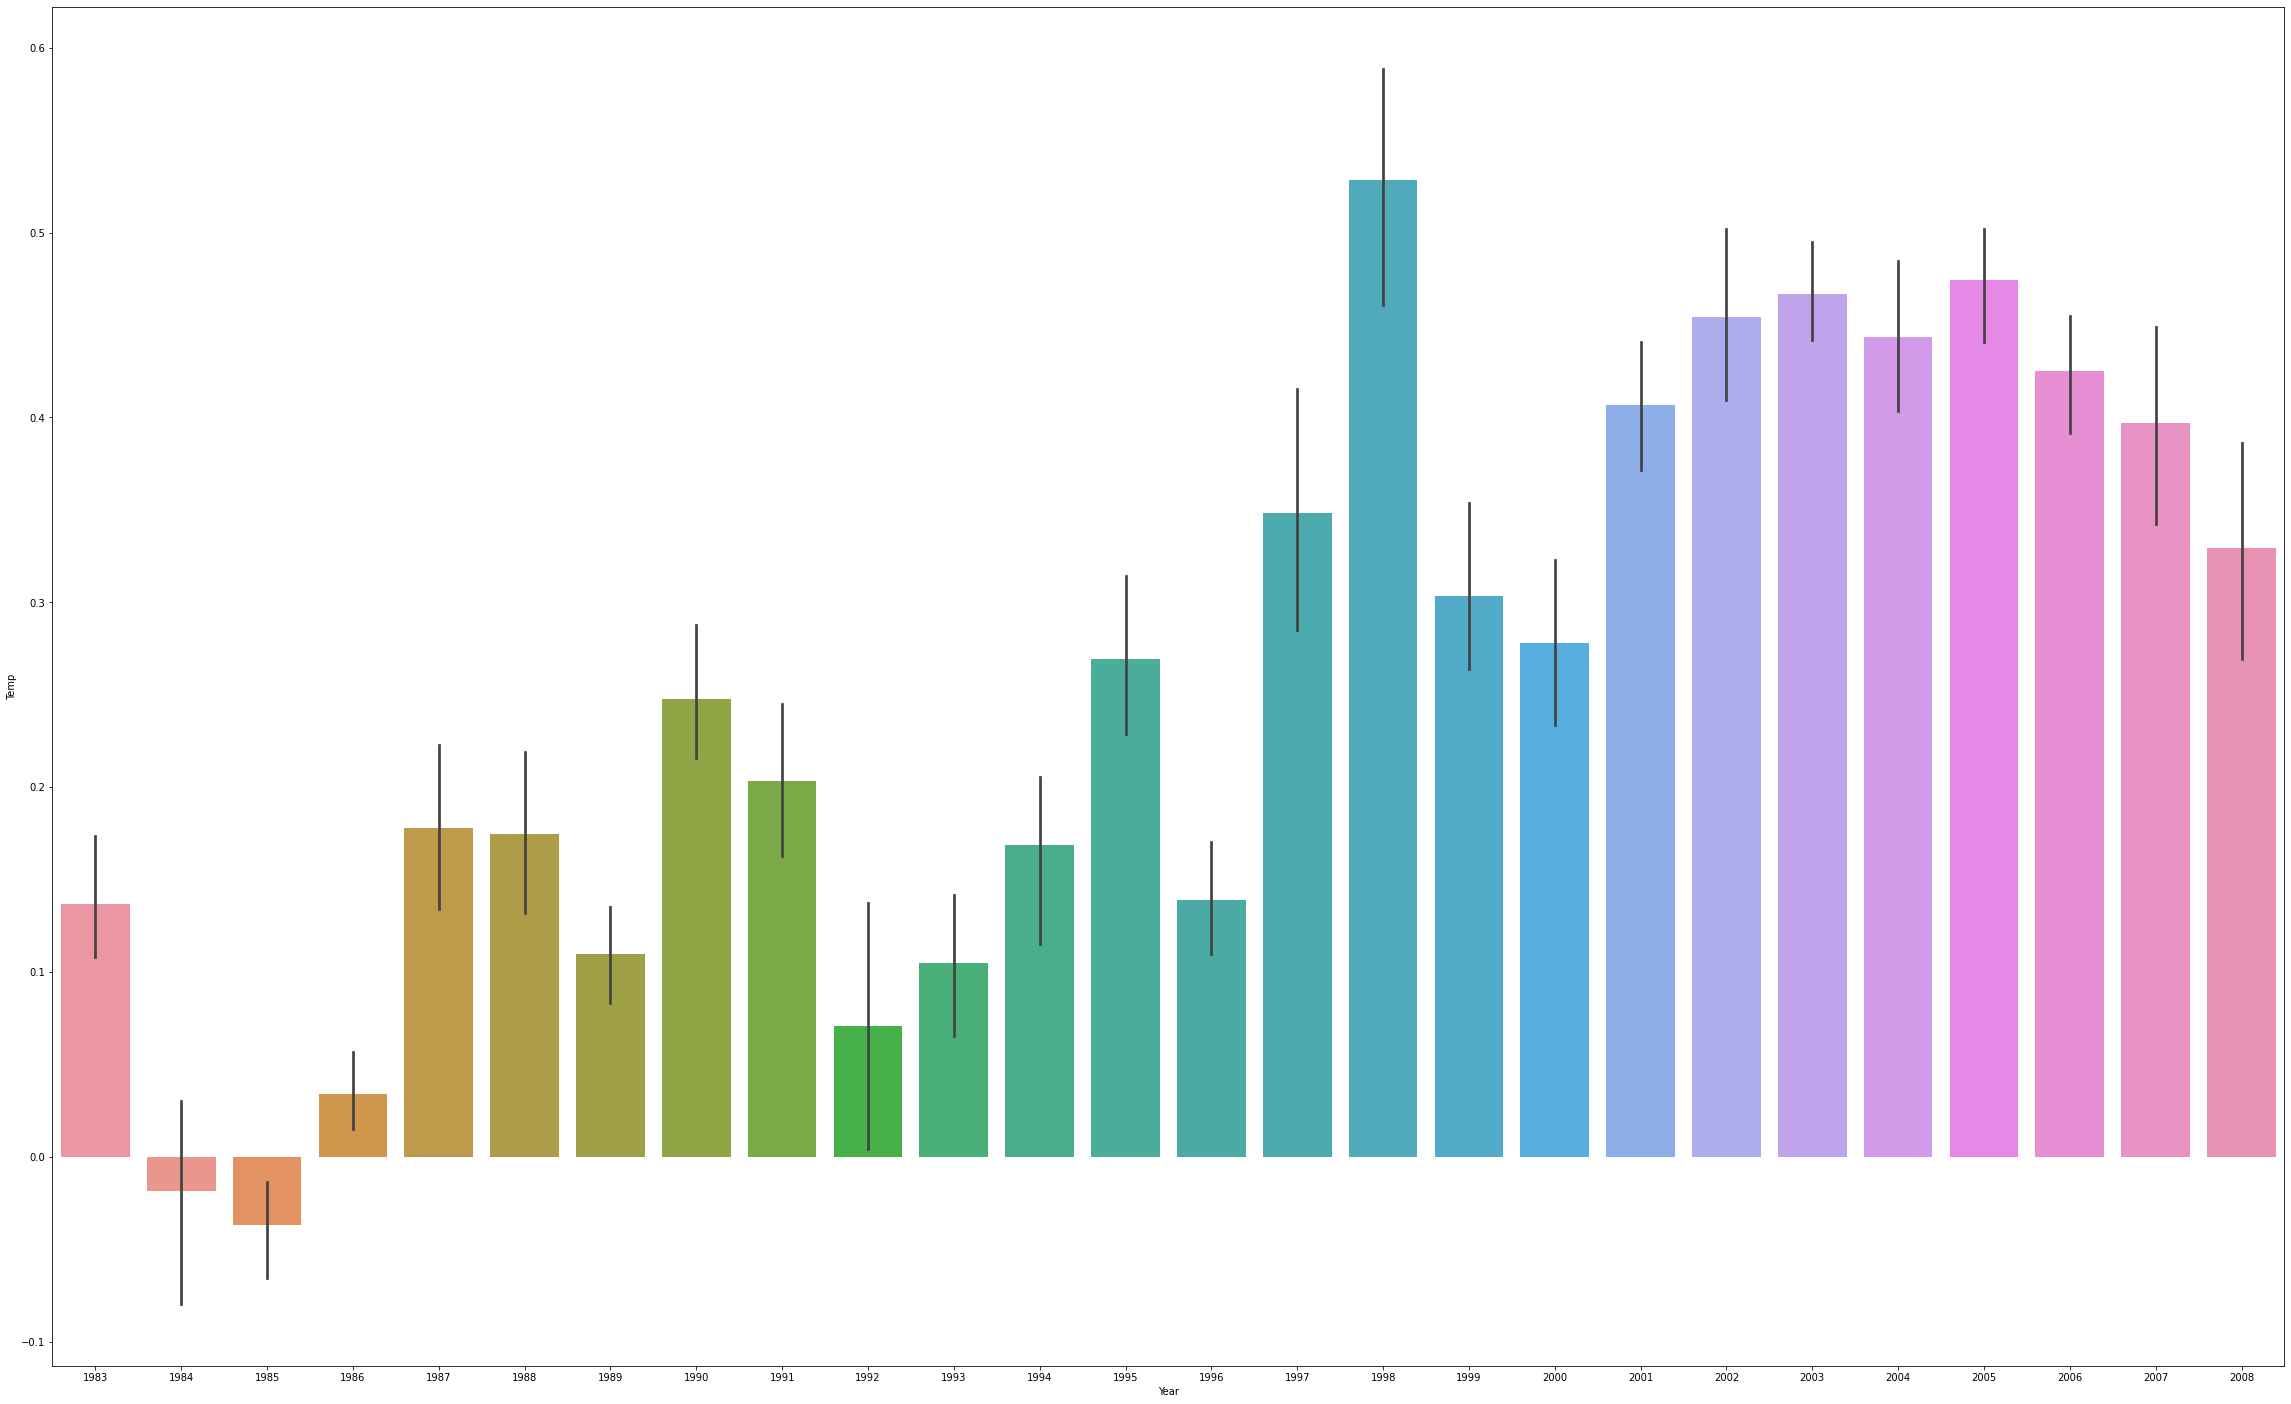

In [ ]:
plt.figure(figsize=(40,25))
sns.barplot(x=df['Year'], y=df['Temp'])

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
X = df['MEI']
y = df['Temp']
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

 
X = df[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]
y = df['Temp']
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7286638950605777


In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
#lr.params

lr.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     85.82
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.20e-65
Time:                        09:45:53   Log-Likelihood:                 238.26
No. Observations:                 246   AIC:                            -458.5
Df Residuals:                     237   BIC:                            -427.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.9657     22.305     -5.603      0.000    -168.906     -81.025
MEI            0.0669      0.007      9.556      0.000       0.053       0.081
CO2            0.0042      0.003      1.664      0.098      -0.001       0.009
CH4         2.767e-05      0.001      0.048      0.962      -0.001       0.001
N2O           -0.0194      0.009     -2.192      0.029      -0.037      -0.002
CFC-11        -0.0086      0.002     -5.228      0.000      -0.012      -0.005
CFC-12         0.0052      0.001      5.336      0.000       0.003       0.007
TSI            0.0947      0.016      5.823      0.000       0.063       0.127
Aerosols      -1.5583      0.235     -6.620      0.000      -2.022      -1.095
==============================================================================
Omnibus:                        5.936   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                7.691
Skew:                           0.160   Prob(JB):                       0.0214
Kurtosis:                       3.805   Cond. No.                     8.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import numpy as np
import scipy.stats

scipy.stats.pearsonr(X_train, y)    # Pearson's r

scipy.stats.spearmanr(x, y)   # Spearman's rho

scipy.stats.kendalltau(x, y)  # Kendall's tau


TypeError: ignored

<Figure size 720x1080 with 0 Axes>